In [1]:
! pip install PyDMD

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 29.4 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.1/973.1 kB 22.9 MB/s eta 0:00:00


In [608]:
import os
ROOT="/app/Exploring_repo"
#ROOT="/share_zeta/Proxy-Sim/PhysicsSimulationDeepLearning"
os.listdir(os.path.join(ROOT,"Data"))
        
    

['2D_1P_DF_eq_Dirichlet_Linear_Linear_f_zero_S20x20_T10_1000.csv',
 '2D_1P_linear_DF_eq_Dirichlet_Linear_Linear_f_zero_S20x20_T10_1000.csv',
 '2D_1P_non_linear_DF_eq_Dirichlet_Linear_Linear_f_zero_S20x20_T10_1000.csv',
 '2D_NS_eq_Dirichlet_Linear_Linear_f_zero_10x10.csv',
 '2D_NS_eq_Dirichlet_Linear_Linear_f_zero_S10x10_T10_500.csv',
 '2D_poisson_eq_Dirichlet_BC_64x64.csv',
 '2D_poisson_eq_Dirichlet_Const_f_Const_64x64.csv',
 '2D_poisson_eq_Dirichlet_Const_Linear_f_Const_64x64.csv',
 '2D_poisson_eq_Dirichlet_Const_Quad_f_Const_64x64.csv',
 '2D_poisson_eq_Dirichlet_Exp_Exp_f_Const_64x64.csv',
 '2D_poisson_eq_Dirichlet_Exp_Exp_f_Linear_Linear_64x64.csv',
 '2D_poisson_eq_Dirichlet_Linear_Linear_f_Const_64x64.csv',
 '2D_poisson_eq_Dirichlet_Quad_Quad_f_Const_64x64.csv',
 '2D_poisson_eq_D_N_R_quad_f_Linear_Linear_64x64.csv',
 '32x32_2D_poisson_eq_Dirichlet_BC.csv',
 '32x32_2D_poisson_eq_Dirichlet_BC2.csv',
 '3D_1P_linear_DF_eq_Dirichlet_Linear_Linear_f_zero_S20x20x20_T10_1000.csv',
 '3D_1P_

In [243]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

from pydmd import FbDMD
from pydmd import DMD
from pydmd import DMD, BOPDMD

from ipywidgets import interact_manual, interact, interactive, FloatSlider
from pydmd.preprocessing import hankel_preprocessing

from einops import rearrange

# Poisson 2D

## spatial prediction on Y form X (x y u)

In [345]:
space=np.zeros((65,65))
data=pd.read_csv(os.path.join(ROOT,"Data","64x64_2D_poisson_eq_Dirichlet_BC_V_BC_H.csv"))
data["x_id"]=(data.x/0.015625).astype(int)
data["y_id"]=(data.y/0.015625).astype(int)

In [ ]:
rearrange(np.real(np.array(Y)),"a (b c) -> a b c",c=4).shape
#np.array(Y).shape

(6, 4225, 4)

In [355]:
train_portion=0.9
train_data=data[data.x_id<int(train_portion*65)]
X=[]
for i in np.unique(train_data.x_id):
    X.append(rearrange(train_data[train_data.x_id==i][["u","x","y"]].values,"a b-> (a b)"))
    
test_data=data[data.x_id>=int(train_portion*65)]

X_=[]
for i in np.unique(test_data.x_id):
    X_.append(rearrange(train_data[train_data.x_id==i][["u","x","y"]].values,"a b-> (a b)"))

In [356]:
d = 1
dmd = DMD(svd_rank=20)
delay_dmd = hankel_preprocessing(dmd, d=d)
delay_dmd.fit(np.array(X).T)


/usr/local/lib/python3.8/dist-packages/pydmd/snapshots.py:73: UserWarning: Input data condition number 2.4777075031916954e+17. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


In [357]:
x_=delay_dmd.pre_post_processed_dmd.predict(np.array(X)[-1])
Y=[x_]
for i in range(int((1-train_portion)*65)-1):
    Y.append(delay_dmd.pre_post_processed_dmd.predict(Y[-1]))

(6, 65, 3)

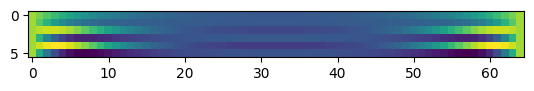

In [358]:
plt.imshow(rearrange(np.real(np.array(Y)),"a (b c) -> a b c",c=3)[:,:,0])
rearrange(np.real(np.array(Y)),"a (b c) -> a b c",c=3).shape

In [359]:
Y_=np.zeros((65,65))
Y_[test_data.x_id,test_data.y_id]=test_data.u
#plt.imshow(Y_[-int(train_portion*65):,:])
np.mean((Y_[-int((1-train_portion)*65):,:]-rearrange(np.real(np.array(Y)),"a (b c) -> a b c",c=3)[:,:,0])**2)


1.71556935586217

# Poisson 3D

In [360]:
space=np.zeros((65,65))
data=pd.read_csv(os.path.join(ROOT,"Data","3D_poisson_eq_Dirichlet_BC_64x64x64.csv"))
data["x_id"]=(data.x/0.015625).astype(int)
data["y_id"]=(data.y/0.015625).astype(int)
data["z_id"]=(data.z/0.015625).astype(int)
data

,Unnamed: 0,u,x,y,z,t,x_id,y_id,z_id
0,0,1.000000,0.000000,0.000000,0.000000,NaN,0,0,0
1,1,1.000244,0.015625,0.000000,0.000000,NaN,1,0,0
2,2,1.000488,0.000000,0.015625,0.000000,NaN,0,1,0
3,3,1.000732,0.015625,0.015625,0.000000,NaN,1,1,0
4,4,1.000000,0.000000,0.000000,0.015625,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...
274620,274620,3.938477,0.968750,1.000000,1.000000,NaN,62,64,64
274621,274621,4.000000,1.000000,1.000000,0.984375,NaN,64,64,63
274622,274622,3.937988,1.000000,0.984375,1.000000,NaN,64,63,64
274623,274623,3.968994,0.984375,1.000000,1.000000,NaN,63,64,64


# Spatial prediction Y from X Y Z U

In [488]:
train_portion=0.7
train_data=data[data.x_id<int(train_portion*65)]
X=[]
for i in np.unique(train_data.x_id):
    X.append(rearrange(train_data[train_data.x_id==i][["u","x","y","z"]].values,"a b-> (a b)"))
X=np.array(X)

test_data=data[data.x_id>=int(train_portion*65)]

X_=[]
for i in np.unique(test_data.x_id):
    X_.append(rearrange(test_data[test_data.x_id==i][["u","x","y","z"]].values,"a b-> (a b)"))
X_=np.array(X_)


In [477]:
train_data[train_data.x_id==i][["u","x","y","z"]].values

array([[1.00390625, 0.0625    , 0.        , 0.        ],
       [1.00439453, 0.0625    , 0.015625  , 0.        ],
       [1.00390625, 0.0625    , 0.        , 0.015625  ],
       ...,
       [3.00390625, 0.0625    , 1.        , 0.984375  ],
       [2.94189453, 0.0625    , 0.984375  , 1.        ],
       [3.00390625, 0.0625    , 1.        , 1.        ]])

In [381]:
d = 1
dmd = DMD(svd_rank=4)
delay_dmd = hankel_preprocessing(dmd, d=d)
delay_dmd.fit(X.T)

/usr/local/lib/python3.8/dist-packages/pydmd/snapshots.py:73: UserWarning: Input data condition number 7954895165717971.0. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


In [497]:
x_=delay_dmd.pre_post_processed_dmd.predict(np.array(X)[-1])
Y=[x_]
for i in range(int((1-train_portion)*65)):
    Y.append(delay_dmd.pre_post_processed_dmd.predict(Y[-1]))

Y_=np.zeros((65,65,65))

Y_[data.x_id,data.y_id,data.z_id]=data.u

In [501]:
np.mean((X_-np.real(np.array(Y)))**2)

1.2276434426153605e-14

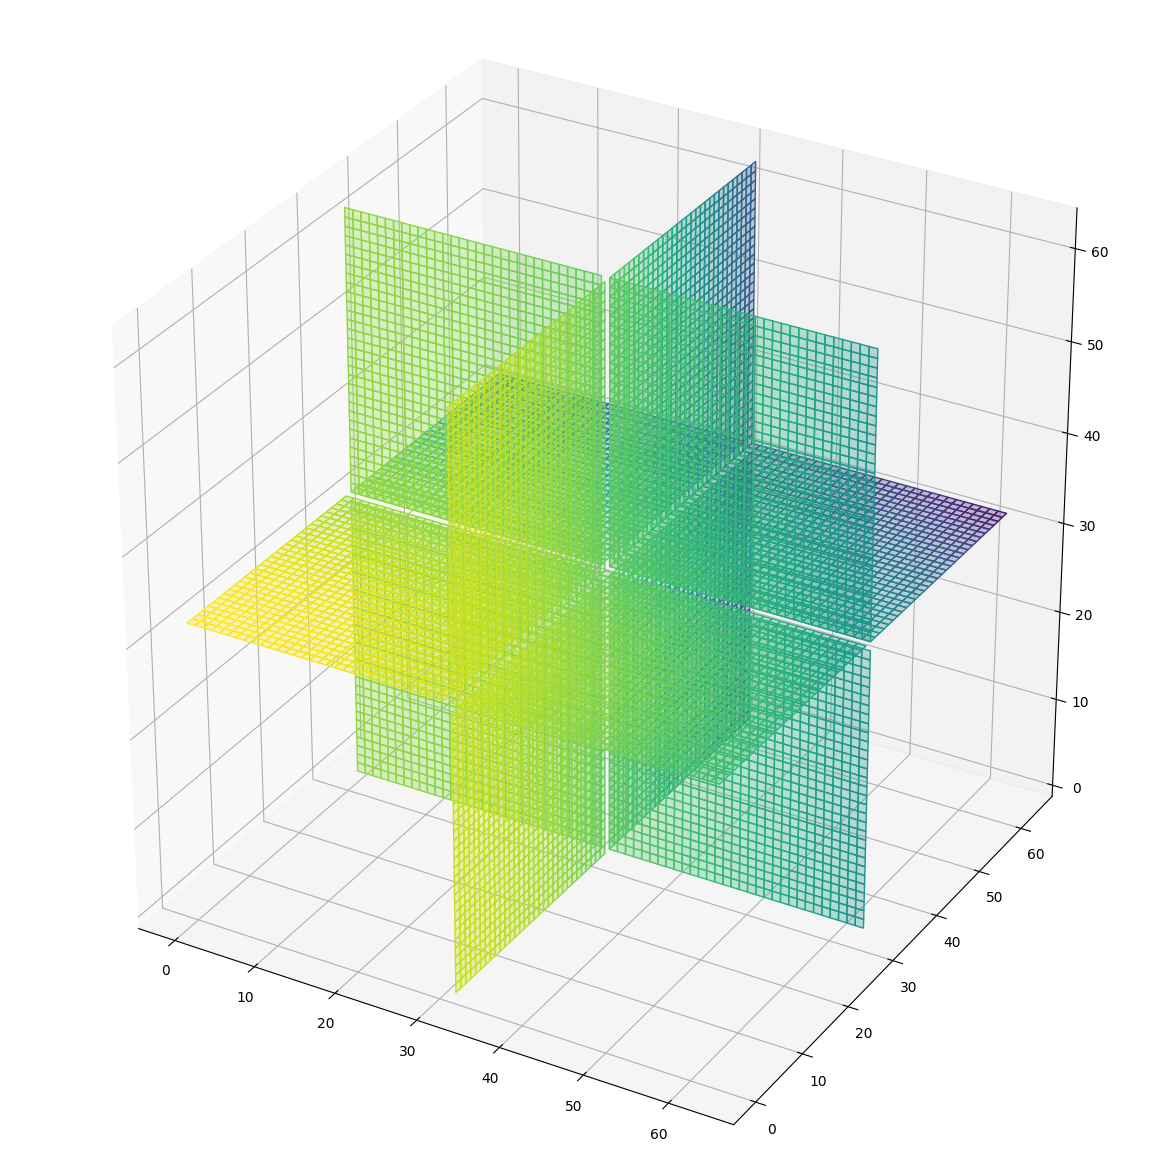

In [439]:
import matplotlib.pyplot as plt
import numpy as np


def plot_quadrants(ax, array, fixed_coord, cmap):
    """For a given 3d *array* plot a plane with *fixed_coord*, using four quadrants."""
    nx, ny, nz = array.shape
    index = {
        'x': (nx // 2, slice(None), slice(None)),
        'y': (slice(None), ny // 2, slice(None)),
        'z': (slice(None), slice(None), nz // 2),
    }[fixed_coord]
    plane_data = array[index]

    n0, n1 = plane_data.shape
    quadrants = [
        plane_data[:n0 // 2, :n1 // 2],
        plane_data[:n0 // 2, n1 // 2:],
        plane_data[n0 // 2:, :n1 // 2],
        plane_data[n0 // 2:, n1 // 2:]
    ]

    min_val = array.min()
    max_val = array.max()

    cmap = plt.get_cmap(cmap)

    for i, quadrant in enumerate(quadrants):
        facecolors = cmap((quadrant - min_val) / (max_val - min_val))
        if fixed_coord == 'x':
            Y, Z = np.mgrid[0:ny // 2, 0:nz // 2]
            X = nx // 2 * np.ones_like(Y)
            Y_offset = (i // 2) * ny // 2
            Z_offset = (i % 2) * nz // 2
            ax.plot_surface(X, Y + Y_offset, Z + Z_offset, rstride=1, cstride=1,
                            facecolors=facecolors, shade=False,alpha=0.3)
        elif fixed_coord == 'y':
            X, Z = np.mgrid[0:nx // 2, 0:nz // 2]
            Y = ny // 2 * np.ones_like(X)
            X_offset = (i // 2) * nx // 2
            Z_offset = (i % 2) * nz // 2
            ax.plot_surface(X + X_offset, Y, Z + Z_offset, rstride=1, cstride=1,
                            facecolors=facecolors, shade=False,alpha=0.3)
        elif fixed_coord == 'z':
            X, Y = np.mgrid[0:nx // 2, 0:ny // 2]
            Z = nz // 2 * np.ones_like(X)
            X_offset = (i // 2) * nx // 2
            Y_offset = (i % 2) * ny // 2
            ax.plot_surface(X + X_offset, Y + Y_offset, Z, rstride=1, cstride=1,
                            facecolors=facecolors, shade=False,alpha=0.3)


def figure_3D_array_slices(array, cmap=None):
    """Plot a 3d array using three intersecting centered planes."""
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(projection='3d')
    ax.set_box_aspect(array.shape)
    plot_quadrants(ax, array, 'x', cmap=cmap)
    plot_quadrants(ax, array, 'y', cmap=cmap)
    plot_quadrants(ax, array, 'z', cmap=cmap)
    return fig, ax


nx, ny, nz = 70, 100, 50
#r_square = (np.mgrid[-1:1:1j * nx, -1:1:1j * ny, -1:1:1j * nz] ** 2).sum(0)

figure_3D_array_slices(Y_, cmap='viridis_r')
plt.show()

plt.show()

# Navier-Stokes 2D

In [543]:
space=np.zeros((65,65))
data=pd.read_csv(os.path.join(ROOT,"Data","2D_NS_eq_Dirichlet_Linear_Linear_f_zero_S10x10_T10_500.csv"))
data["x_id"]=(data.x/0.015625).astype(int)
data["y_id"]=(data.y/0.015625).astype(int)
data["t_id"]=(data.t/0.02).astype(int)

In [589]:
# 500 time steps
train_portion=0.5
train_data=data[data.t<(10*train_portion)]
test_data=data[np.logical_not(data.t<(10*train_portion))]
X=[]
for i in np.unique(train_data.t):
    if rearrange(train_data[train_data.t==i][["u","v","x","y","t"]].values,"a b-> (a b)").shape[0]!=605:
        print(rearrange(train_data[train_data.t==i][["u","v","x","y","t"]].values,"a b-> (a b)").shape)
        print(train_data[train_data.t==i])
    X.append(rearrange(train_data[train_data.t==i][["u","v","x","y","t"]].values,"a b-> (a b)"))
X=np.array(X)

X_=[]
for i in np.unique(test_data.t):
    X_.append(rearrange(test_data[test_data.t==i][["u","v","x","y","t"]].values,"a b-> (a b)"))
X_=np.array(X_)

In [590]:
d = 1
dmd = DMD(svd_rank=4)
delay_dmd = hankel_preprocessing(dmd, d=d)
delay_dmd.fit(X.T)

/usr/local/lib/python3.8/dist-packages/pydmd/snapshots.py:73: UserWarning: Input data condition number 5.2047999749780326e+17. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


In [591]:
x_=delay_dmd.pre_post_processed_dmd.predict(np.array(X)[-1])
Y=[x_]
for i in range(len(X_)-1):
    Y.append(delay_dmd.pre_post_processed_dmd.predict(Y[-1]))

#Y_=np.zeros((65,65,65))
#Y_[data.x_id,data.y_id,data.z_id]=data.u

In [592]:
np.mean((X_-np.real(np.array(Y)))**2)

0.00010836749483177839

# Navier-Stokes 3D

In [623]:
space=np.zeros((65,65))
data=pd.read_csv(os.path.join(ROOT,"Data","3D_NS_eq_Dirichlet_Linear_Linear_f_zero_S10x10_T10_500.csv"))
data["x_id"]=(data.x/0.015625).astype(int)
data["y_id"]=(data.y/0.015625).astype(int)
data["t_id"]=(data.t/0.02).astype(int)

In [624]:
# 500 time steps
train_portion=0.7
train_data=data[data.t<(10*train_portion)]
test_data=data[np.logical_not(data.t<(10*train_portion))]

train_data=data[data.t>(10*train_portion)]
test_data=data[np.logical_not(data.t>(10*train_portion))]

X=[]
for i in np.unique(train_data.t):
    X.append(rearrange(train_data[train_data.t==i][["u","v","x","y","z","t"]].values,"a b-> (a b)"))
X=np.array(X)

X_=[]
for i in np.unique(test_data.t):
    X_.append(rearrange(test_data[test_data.t==i][["u","v","x","y","z","t"]].values,"a b-> (a b)"))
X_=np.array(X_)

In [625]:
d = 1
dmd = DMD(svd_rank=4)
delay_dmd = hankel_preprocessing(dmd, d=d)
delay_dmd.fit(X.T)

/usr/local/lib/python3.8/dist-packages/pydmd/snapshots.py:73: UserWarning: Input data condition number 2976148034987023.5. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


In [626]:
x_=delay_dmd.pre_post_processed_dmd.predict(np.array(X)[-1])
Y=[x_]
for i in range(len(X_)-1):
    Y.append(delay_dmd.pre_post_processed_dmd.predict(Y[-1]))

In [627]:
np.mean((X_-np.real(np.array(Y)))**2)

16.669966010697983

# Darcy Flux 2D

In [617]:
space=np.zeros((65,65))
data=pd.read_csv(os.path.join(ROOT,"Data","2D_1P_linear_DF_eq_Dirichlet_Linear_Linear_f_zero_S20x20_T10_1000.csv"))
data["x_id"]=(data.x/0.015625).astype(int)
data["y_id"]=(data.y/0.015625).astype(int)
data["t_id"]=(data.t/0.02).astype(int)
data

,Unnamed: 0,p,x,y,z,t,x_id,y_id,t_id
0,0,2.125067e+00,0.95,0.00,0.0,0.01,60,0,0
1,1,2.254919e+00,1.00,0.00,0.0,0.01,64,0,0
2,2,2.111448e+00,1.00,0.05,0.0,0.01,64,3,0
3,3,2.090507e+00,0.95,0.05,0.0,0.01,60,3,0
4,4,1.908185e+00,0.90,0.00,0.0,0.01,57,0,0
...,...,...,...,...,...,...,...,...,...
440995,440995,5.442646e+02,0.05,0.95,0.0,10.00,3,60,500
440996,440996,1.006352e+03,0.10,1.00,0.0,10.00,6,64,500
440997,440997,-9.278426e-16,0.00,0.95,0.0,10.00,0,60,500
440998,440998,4.011496e+02,0.05,1.00,0.0,10.00,3,64,500


In [618]:
# 500 time steps
train_portion=0.7
train_data=data[data.t<(10*train_portion)]
test_data=data[np.logical_not(data.t<(10*train_portion))]
X=[]
for i in np.unique(train_data.t):
    X.append(rearrange(train_data[train_data.t==i][["p","x","y","t"]].values,"a b-> (a b)"))
X=np.array(X)

X_=[]
for i in np.unique(test_data.t):
    X_.append(rearrange(test_data[test_data.t==i][["p","x","y","t"]].values,"a b-> (a b)"))
X_=np.array(X_)

In [619]:
d = 1
dmd = DMD(svd_rank=4)
delay_dmd = hankel_preprocessing(dmd, d=d)
delay_dmd.fit(X.T)

/usr/local/lib/python3.8/dist-packages/pydmd/snapshots.py:73: UserWarning: Input data condition number 2.3141498859213753e+125. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


In [620]:
x_=delay_dmd.pre_post_processed_dmd.predict(np.array(X)[-1])
Y=[x_]
for i in range(len(X_)-1):
    Y.append(delay_dmd.pre_post_processed_dmd.predict(Y[-1]))

In [628]:
np.mean((X_-np.real(np.array(Y)))**2)

16.669966010697983

# Darcy Flux 3D

In [630]:
space=np.zeros((65,65))
data=pd.read_csv(os.path.join(ROOT,"Data","3D_1P_linear_DF_eq_Dirichlet_Linear_Linear_f_zero_S20x20x20_T10_1000.csv"))
data["x_id"]=(data.x/0.015625).astype(int)
data["y_id"]=(data.y/0.015625).astype(int)
data["t_id"]=(data.t/0.02).astype(int)
data

,Unnamed: 0,p,x,y,z,t,x_id,y_id,t_id
0,0,-7.552262e-01,0.95,0.00,0.00,0.01,60,0,0
1,1,-7.785217e-01,1.00,0.00,0.00,0.01,64,0,0
2,2,-7.889003e-01,1.00,0.05,0.00,0.01,64,3,0
3,3,-7.945531e-01,1.00,0.05,0.05,0.01,64,3,0
4,4,-7.852993e-01,1.00,0.00,0.05,0.01,64,0,0
...,...,...,...,...,...,...,...,...,...
9260995,9260995,9.981238e-01,0.00,1.00,0.90,10.00,0,64,500
9260996,9260996,-3.325009e+107,0.05,1.00,1.00,10.00,3,64,500
9260997,9260997,9.981238e-01,0.00,1.00,0.95,10.00,0,64,500
9260998,9260998,9.981238e-01,0.00,0.95,1.00,10.00,0,60,500


In [631]:
# 500 time steps
train_portion=0.7
train_data=data[data.t<(10*train_portion)]
test_data=data[np.logical_not(data.t<(10*train_portion))]
X=[]
for i in np.unique(train_data.t):
    X.append(rearrange(train_data[train_data.t==i][["p","x","y","z","t"]].values,"a b-> (a b)"))
X=np.array(X)

X_=[]
for i in np.unique(test_data.t):
    X_.append(rearrange(test_data[test_data.t==i][["p","x","y","z","t"]].values,"a b-> (a b)"))
X_=np.array(X_)

In [635]:
d = 1
dmd = DMD(svd_rank=10)
delay_dmd = hankel_preprocessing(dmd, d=d)
delay_dmd.fit(X.T)

In [636]:
x_=delay_dmd.pre_post_processed_dmd.predict(np.array(X)[-1])
Y=[x_]
for i in range(len(X_)-1):
    Y.append(delay_dmd.pre_post_processed_dmd.predict(Y[-1]))

In [637]:
np.mean((X_-np.real(np.array(Y)))**2)

2.819543061046349e+294

# Darcy Flux 2D (non linear permeability)

In [638]:
space=np.zeros((65,65))
data=pd.read_csv(os.path.join(ROOT,"Data","2D_1P_non_linear_DF_eq_Dirichlet_Linear_Linear_f_zero_S20x20_T10_1000.csv"))
data["x_id"]=(data.x/0.015625).astype(int)
data["y_id"]=(data.y/0.015625).astype(int)
data["t_id"]=(data.t/0.02).astype(int)
data

,Unnamed: 0,p,x,y,z,t,x_id,y_id,t_id
0,0,7.322680e+00,0.95,0.00,0.0,0.01,60,0,0
1,1,4.049991e+00,1.00,0.00,0.0,0.01,64,0,0
2,2,1.623749e+00,1.00,0.05,0.0,0.01,64,3,0
3,3,3.873965e-01,0.95,0.05,0.0,0.01,60,3,0
4,4,3.062632e-01,0.90,0.00,0.0,0.01,57,0,0
...,...,...,...,...,...,...,...,...,...
440995,440995,-1.703382e+54,0.05,0.95,0.0,10.00,3,60,500
440996,440996,-1.566727e+54,0.10,1.00,0.0,10.00,6,64,500
440997,440997,-1.636314e-15,0.00,0.95,0.0,10.00,0,60,500
440998,440998,-1.832125e+54,0.05,1.00,0.0,10.00,3,64,500


In [639]:
# 500 time steps
train_portion=0.7
train_data=data[data.t<(10*train_portion)]
test_data=data[np.logical_not(data.t<(10*train_portion))]
X=[]
for i in np.unique(train_data.t):
    X.append(rearrange(train_data[train_data.t==i][["p","x","y","t"]].values,"a b-> (a b)"))
X=np.array(X)

X_=[]
for i in np.unique(test_data.t):
    X_.append(rearrange(test_data[test_data.t==i][["p","x","y","t"]].values,"a b-> (a b)"))
X_=np.array(X_)

In [640]:
d = 1
dmd = DMD(svd_rank=4)
delay_dmd = hankel_preprocessing(dmd, d=d)
delay_dmd.fit(X.T)

/usr/local/lib/python3.8/dist-packages/pydmd/snapshots.py:73: UserWarning: Input data condition number 5.492065654301045e+166. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


In [641]:
x_=delay_dmd.pre_post_processed_dmd.predict(np.array(X)[-1])
Y=[x_]
for i in range(len(X_)-1):
    Y.append(delay_dmd.pre_post_processed_dmd.predict(Y[-1]))

In [642]:
np.mean((X_-np.real(np.array(Y)))**2)

8.938560817243107e+257

# Darcy Flux 3D (non linear permeability)

In [643]:
space=np.zeros((65,65))
data=pd.read_csv(os.path.join(ROOT,"Data","3D_1P_non_linear_DF_eq_Dirichlet_Linear_Linear_f_zero_S20x20x20_T10_1000.csv"))
data["x_id"]=(data.x/0.015625).astype(int)
data["y_id"]=(data.y/0.015625).astype(int)
data["t_id"]=(data.t/0.02).astype(int)
data

,Unnamed: 0,p,x,y,z,t,x_id,y_id,t_id
0,0,-1.714790e-06,0.95,0.00,0.00,0.01,60,0,0
1,1,1.726788e-06,1.00,0.00,0.00,0.01,64,0,0
2,2,-3.823168e-06,1.00,0.05,0.00,0.01,64,3,0
3,3,8.042441e-07,1.00,0.05,0.05,0.01,64,3,0
4,4,3.504159e-07,1.00,0.00,0.05,0.01,64,0,0
...,...,...,...,...,...,...,...,...,...
9260995,9260995,-2.327954e-49,0.00,1.00,0.90,10.00,0,64,500
9260996,9260996,1.062513e+15,0.05,1.00,1.00,10.00,3,64,500
9260997,9260997,-2.327954e-49,0.00,1.00,0.95,10.00,0,64,500
9260998,9260998,-2.327954e-49,0.00,0.95,1.00,10.00,0,60,500


In [648]:
# 500 time steps
train_portion=0.5
train_data=data[data.t<(10*train_portion)]
test_data=data[np.logical_not(data.t<(10*train_portion))]
X=[]
for i in np.unique(train_data.t):
    X.append(rearrange(train_data[train_data.t==i][["p","x","y","t"]].values,"a b-> (a b)"))
X=np.array(X)

X_=[]
for i in np.unique(test_data.t):
    X_.append(rearrange(test_data[test_data.t==i][["p","x","y","t"]].values,"a b-> (a b)"))
X_=np.array(X_)

In [649]:
d = 1
dmd = DMD(svd_rank=4)
delay_dmd = hankel_preprocessing(dmd, d=d)
delay_dmd.fit(X.T)

/usr/local/lib/python3.8/dist-packages/pydmd/snapshots.py:73: UserWarning: Input data condition number 2.7078166468658377e+94. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


In [650]:
x_=delay_dmd.pre_post_processed_dmd.predict(np.array(X)[-1])
Y=[x_]
for i in range(len(X_)-1):
    Y.append(delay_dmd.pre_post_processed_dmd.predict(Y[-1]))

In [651]:
np.mean((X_-np.real(np.array(Y)))**2)

6.445980932281383e+144